<center><H1><b> Analysis of Experimental Spin Relaxation Data</b></H1></center>
<br>
<center>Code requires python 3.8 or newer, as math.dist is not implemented before</center>



In [1]:
import sys
import numpy as np
import gc
import matplotlib.pyplot as plt
import math

#sys.path.append("/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times") 
import ExperimentalRelaxationTimes as ERT
import yaml

gc.collect()

0

<H3>Functions for relaxation time analysis in ExperimentalRelaxationTimes</H3>

In [2]:
help(ERT)

Help on module ExperimentalRelaxationTimes:

NAME
    ExperimentalRelaxationTimes - Try if help works

FUNCTIONS
    add_exp_data(field, name, exp, author, path, prefix, info, increments, correct, coeffs, outputs)
    
    compare_spectra(Nfactor, maxDist, *files)
        Function groups peaks from different experiments.
        Developed for testing different processing parameters for T1 and T2 parameters.
        
        Takes the imput file with the most peaks as the reference.
        Groups peaks based on minimal Eucliac distance with Nfactor weight
        parameter for N dimention.
        
        In the future, the compare_spectra method should be universal for any comparison, including hetNOE
        
        Input: Nfactor, maxDist, *files
        
               Nfactor  - used to weight the N dimention with respect to H dimention.
                          Values in literature range between 0.1 and 0.45
               maxDist  - maximal distance for peaks to be defined as

<H3>Add new experimental data </H3>

In [3]:
name="Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022"
field="600 MHz"
#field="850 MHz"
exp="T1"
#exp="T2"
#exp="hetNOE"
author=["Ricky Nencini",  "ricky.nencini@helsinki.fi"]
path="/home/nenciric/Documents/git/COR15A_Tobi/ExperimentalData/600MHz/Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022/T1/experiment_110/"
prefix="T1_cor15A_G68A_"
info="Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022, experiment 110"
increments=250
correct=[0,0] # correction for wrong offset of ppm, should be (0,0) if processing done correctly 
coeffs=[32,64] # different LP options processed at TopSpin
outputs=[0,2,8,32,128]

experiments=ERT.add_exp_data(field,name,exp,author,path,prefix,info,increments,correct,coeffs,outputs)


600 Mhz experiments: 

Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022 - T1, 
Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022 - T1, 

 
850 Mhz experiments:



<H3> Select experiment to analyze</H3>

In [4]:
field="600 MHz"
experiment="Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022"#
#experiment="Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022"

<H3> Analysis of T1</H3>
<H4> WT COR15A, 20 mM Na-P buffer,  600 MHz </H4>

Constant settings for given experiment

In [5]:
save_dest="/home/local/nenciric/Documents/git/COR15A_Tobi/Analysis/AnalyzedData/T1/"
save_dest=save_dest+experiment+".yaml"

path=experiments[field][experiment]["T1"]["PATH"]
author=experiments[field][experiment]["T1"]["AUTHOR"]
info=experiments[field][experiment]["T1"]["INFO"]
prefix=experiments[field][experiment]["T1"]["PREFIX"]
coeffs=experiments[field][experiment]["T1"]["COEFF"]
outputs=experiments[field][experiment]["T1"]["OUTPUTS"]
increments=experiments[field][experiment]["T1"]["INCREMENTS"]
correct=experiments[field][experiment]["T1"]["CORRECT"]

Parameters to be tuned for analysis

In [9]:
skip_points=0 # number of poits to be alway skipped for exponential fitting, stil checks if points after this
              # value are decreasing, so far seems fine to set to 0 for T1, 
              # but may be neccesary to set to 1 or 2 for T2

Nfactor=1/6
maxDist = 0.25 # to be tuned 


Perform analysis

In [12]:
data_from_DynamicCenter=prefix+str(increments)+"incr_no_0coeff_0output.txt"
data_from_DynamicCenter=path+data_from_DynamicCenter

results=[ERT.t1_t2_relaxations(data_from_DynamicCenter,field,0,0,author,info,increments,skip_points,correct)]
for coeff in coeffs:
    for outputP in outputs:
        data_from_DynamicCenter=prefix+str(increments)+"incr_no_"+str(coeff)+"coeff_"+str(outputP)+"output.txt"
        data_from_DynamicCenter=path+data_from_DynamicCenter
        results.append(ERT.t1_t2_relaxations(data_from_DynamicCenter,field,coeff,outputP,author,info,increments,skip_points,correct))

comparison=ERT.compare_spectra(Nfactor,maxDist,*results)


with open(save_dest, 'w') as f:
    yaml.dump(results,f, sort_keys=False)

/home/local/nenciric/Documents/git/COR15A_Tobi/Analysis/ExperimentalRelaxationTimes.py:68: RuntimeWarning: invalid value encountered in log
  for_LS=np.append(for_LS,[[mixing_times[i-1],np.log(peaks_intensities[peak,i])]],axis=0)
/home/local/nenciric/Documents/git/COR15A_Tobi/Analysis/ExperimentalRelaxationTimes.py:74: RuntimeWarning: invalid value encountered in log
  for_LS=np.append(for_LS,[[mixing_times[i-1],np.log(peaks_intensities[peak,i])]],axis=0)


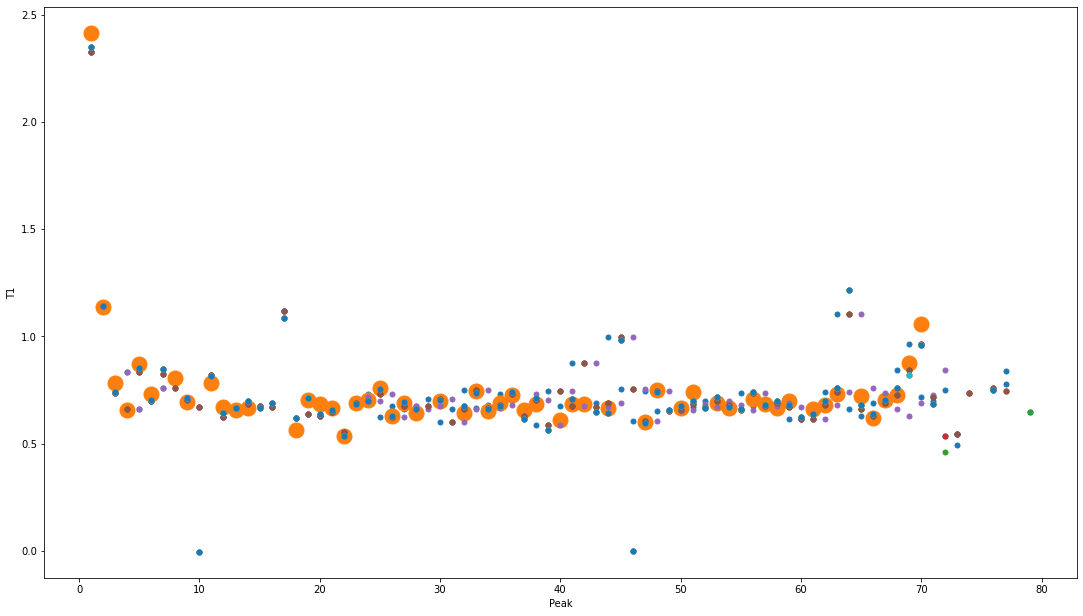

In [13]:
highlight=[0,0] # analysis to be highlited in the plot [COEFFICIENTS,OUTPUT_POINTS], 
                # ([0, 0] - no linear prediction, row data used)
ERT.plot_data(comparison,coeffs,outputs,highlight)

Peak 1


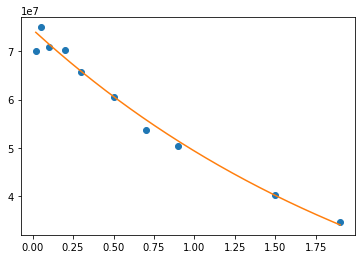

Peak 2


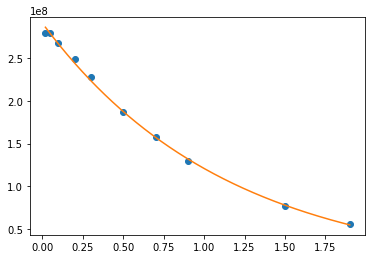

Peak 3


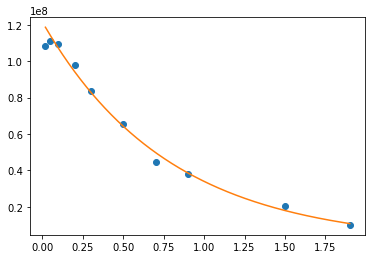

Peak 4


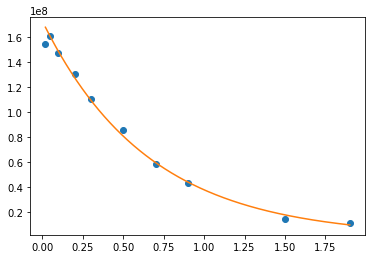

Peak 5


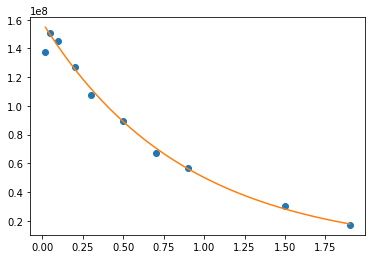

Peak 6


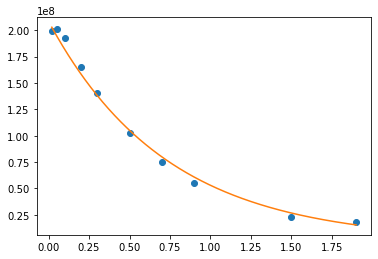

Peak 7


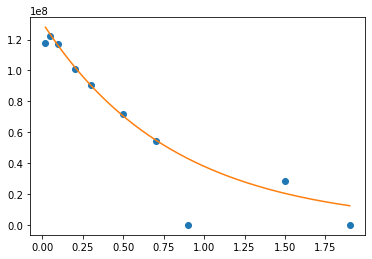

Peak 8


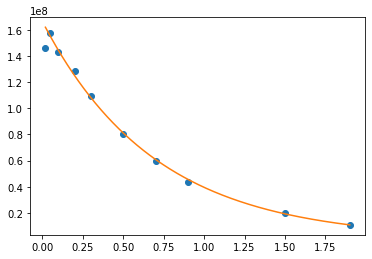

Peak 9


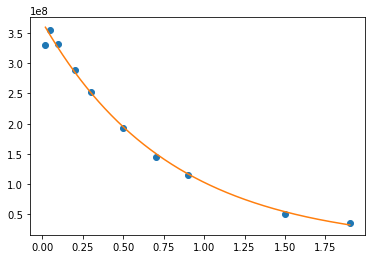

Peak 10


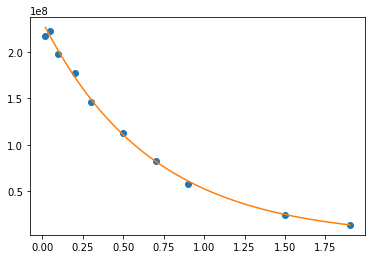

Peak 11


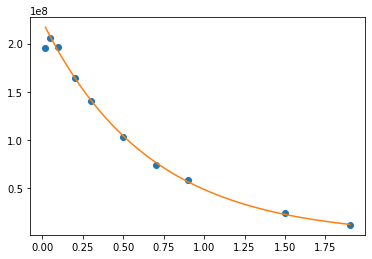

Peak 12


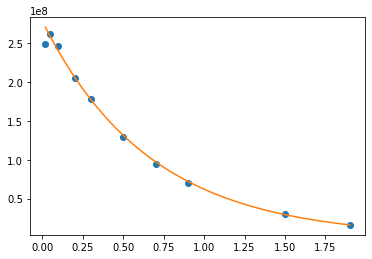

Peak 13


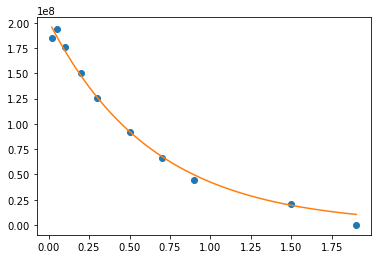

Peak 14


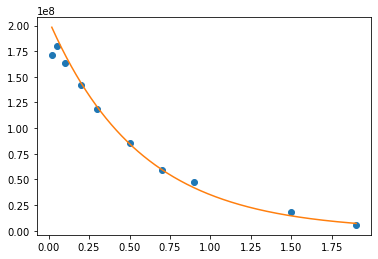

Peak 15


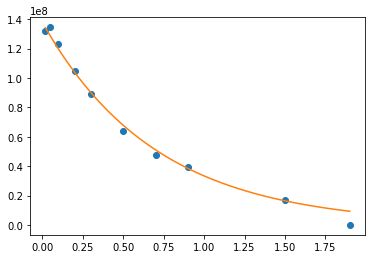

Peak 16


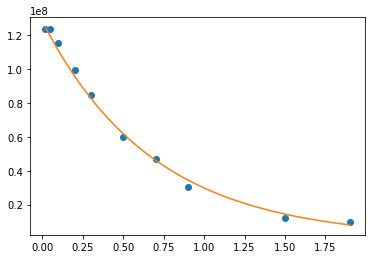

Peak 17


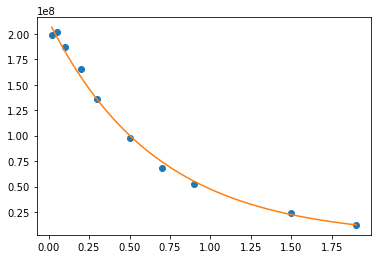

Peak 18


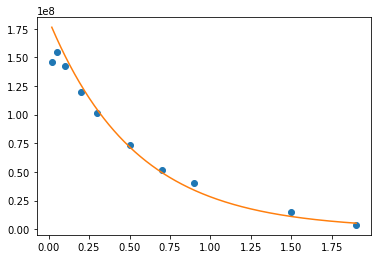

Peak 19


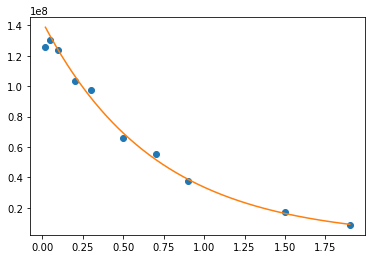

Peak 20


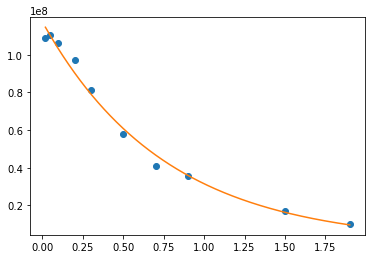

Peak 21


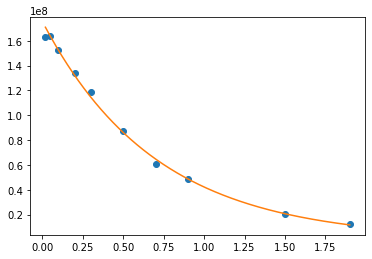

Peak 22


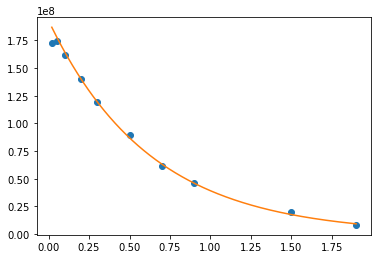

Peak 23


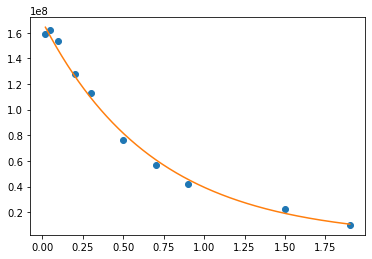

Peak 24


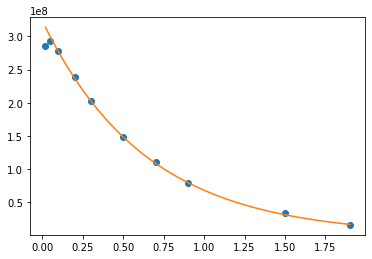

Peak 25


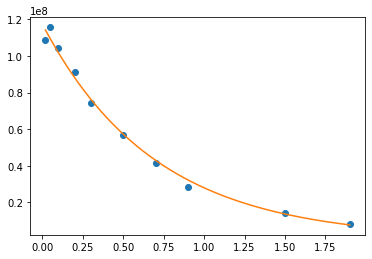

Peak 26


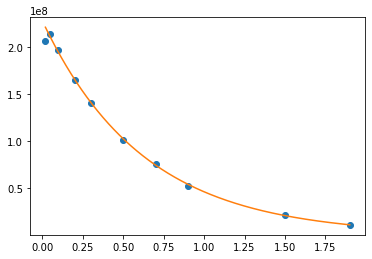

Peak 27


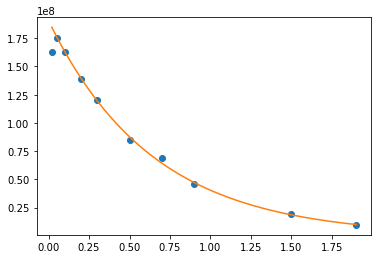

Peak 28


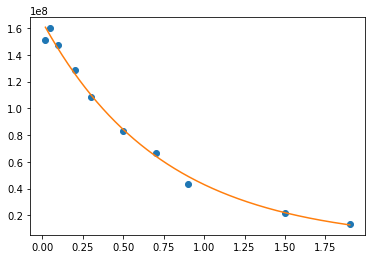

Peak 29


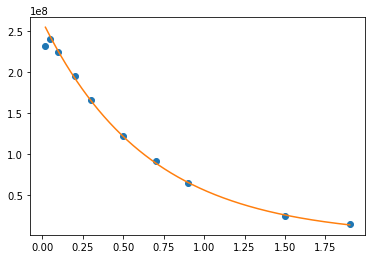

Peak 30


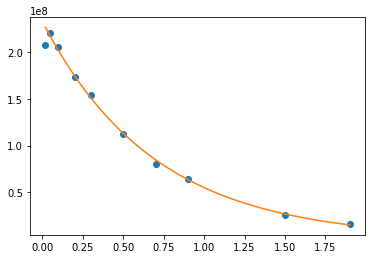

Peak 31


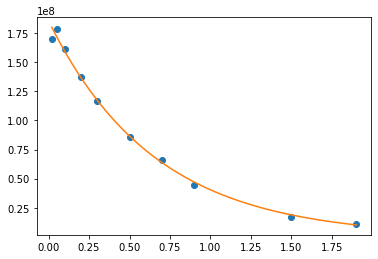

Peak 32


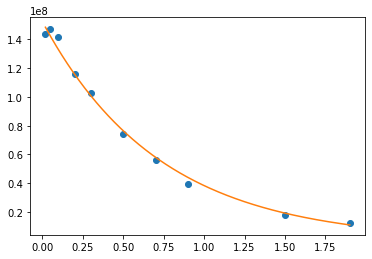

Peak 33


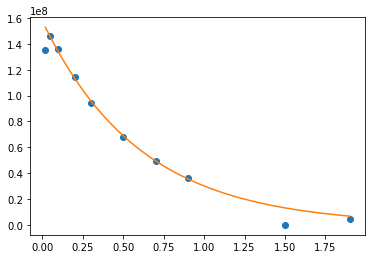

Peak 34


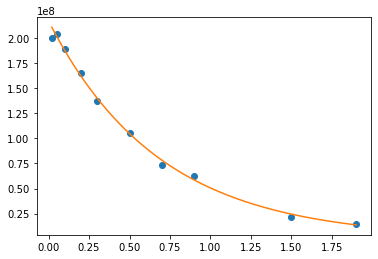

Peak 35


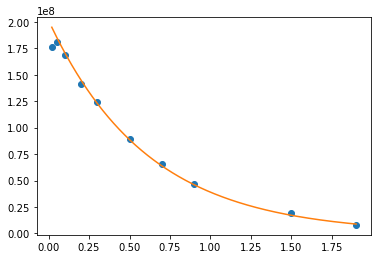

Peak 36


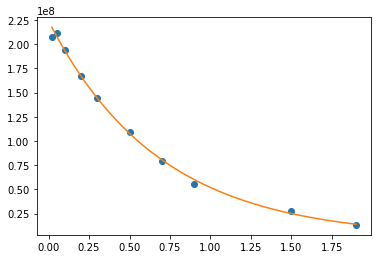

Peak 37


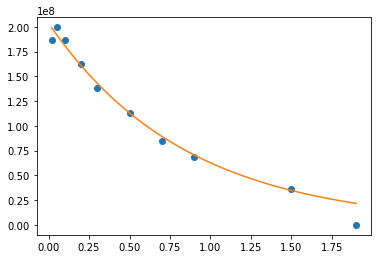

Peak 38


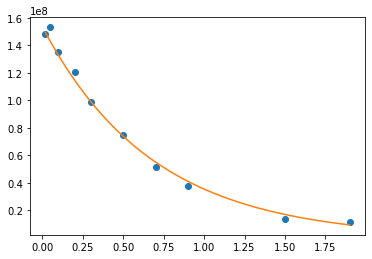

Peak 39


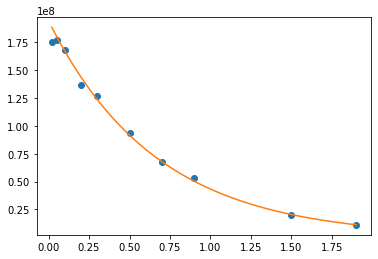

Peak 40


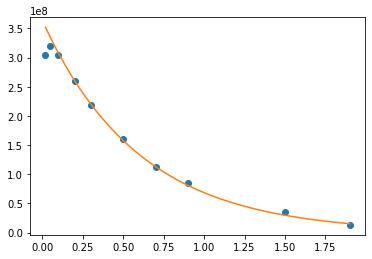

Peak 41


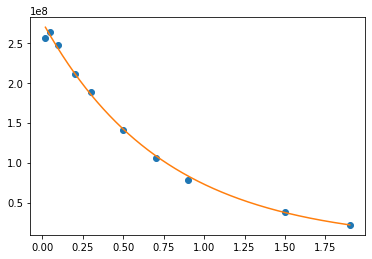

Peak 42


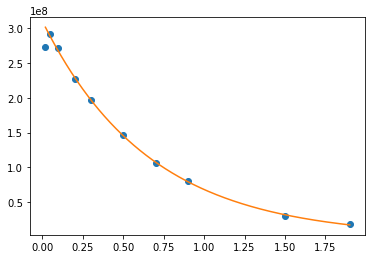

Peak 43


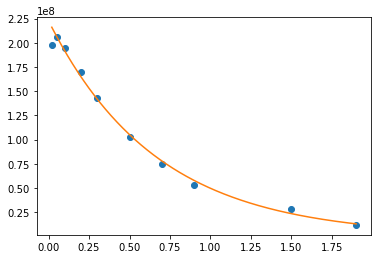

Peak 44


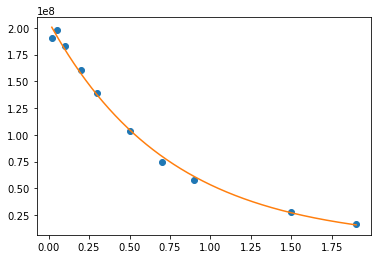

Peak 45


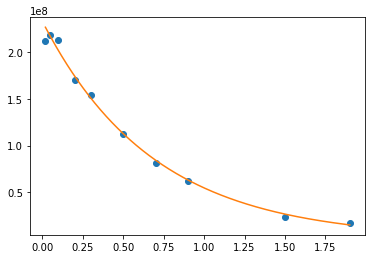

Peak 46


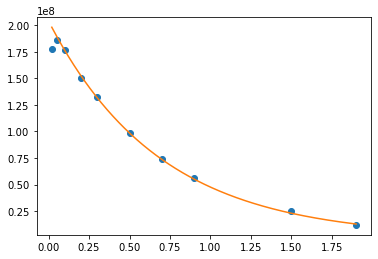

Peak 47


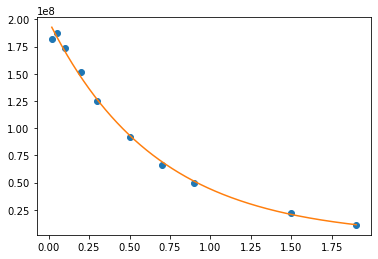

Peak 48


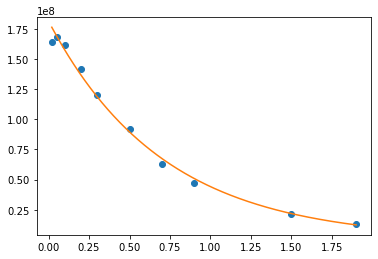

Peak 49


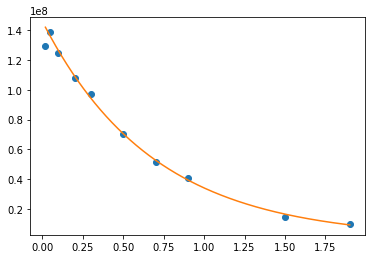

Peak 50


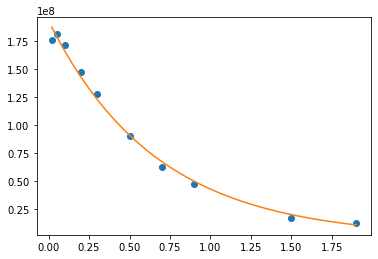

Peak 51


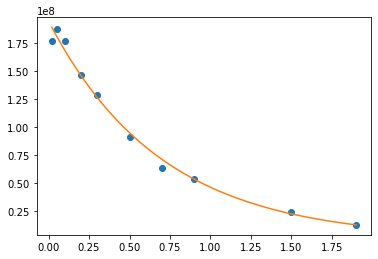

Peak 52


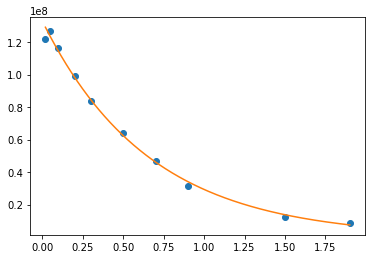

Peak 53


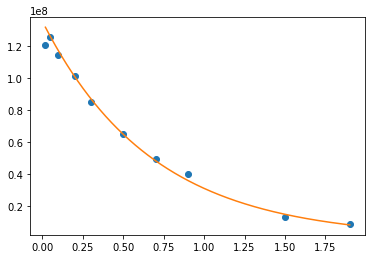

Peak 54


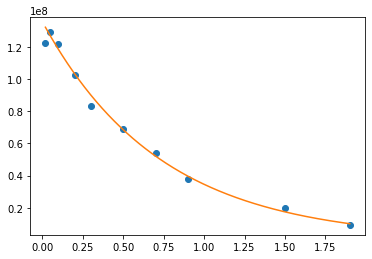

Peak 55


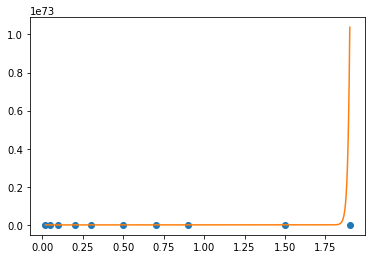

Peak 56


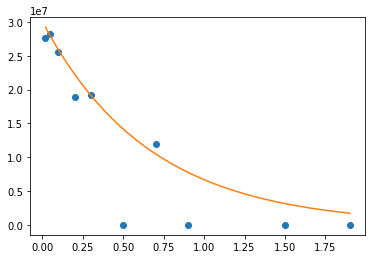

Peak 57


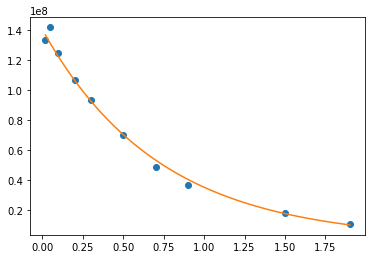

Peak 58


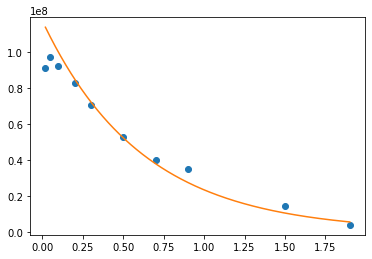

Peak 59


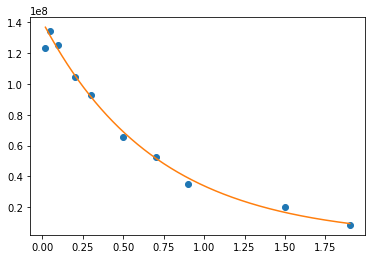

Peak 60


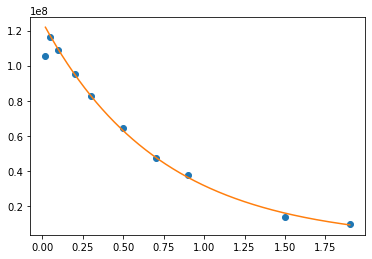

Peak 61


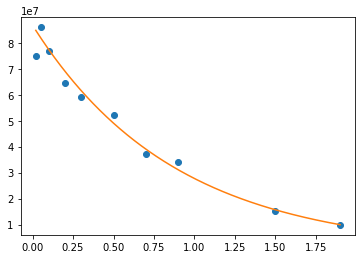

Peak 62


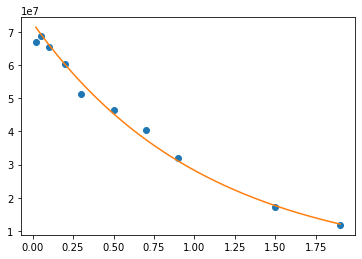

In [14]:
ERT.plot_fit_of_peaks(highlight,*results)

In [15]:
comparison

{'1': {'REFERENCE': {'ppm': [130.954, 7.869],
   'T1': 2.325891056698246,
   'COEFFICIENTS': 32,
   'OUTPUT_POINTS': 32},
  'file0': {'ppm': [130.954, 7.869],
   'T1': 2.416309457236078,
   'COEFFICIENTS': 0,
   'OUTPUT_POINTS': 0,
   'PEAK_NAME': '1'},
  'file1': {'ppm': [130.954, 7.869],
   'T1': 2.325891056698246,
   'COEFFICIENTS': 32,
   'OUTPUT_POINTS': 0,
   'PEAK_NAME': '1'},
  'file2': {'ppm': [130.954, 7.869],
   'T1': 2.325891056698246,
   'COEFFICIENTS': 32,
   'OUTPUT_POINTS': 2,
   'PEAK_NAME': '1'},
  'file3': {'ppm': [130.987, 7.869],
   'T1': 2.325891056698246,
   'COEFFICIENTS': 32,
   'OUTPUT_POINTS': 8,
   'PEAK_NAME': '1'},
  'file4': {'ppm': [130.954, 7.869],
   'T1': 2.325891056698246,
   'COEFFICIENTS': 32,
   'OUTPUT_POINTS': 128,
   'PEAK_NAME': '1'},
  'file5': {'ppm': [130.954, 7.869],
   'T1': 2.350609229074526,
   'COEFFICIENTS': 64,
   'OUTPUT_POINTS': 0,
   'PEAK_NAME': '1'},
  'file6': {'ppm': [130.954, 7.869],
   'T1': 2.350609229074526,
   'COEFFICIEN

In [12]:
with open(save_dest) as yaml_file:
     rrr= yaml.load(yaml_file, Loader=yaml.FullLoader)

In [72]:
#WT=comparison
#G68A=comparison

In [163]:
WT=results

#G68A=results


In [102]:
def group_peaks(Nfactor,maxDist,*files):
    most_peaks=0
    for i,file in enumerate(files):
        if len(file['peaks'])>most_peaks:
            most_peaks=len(file['peaks'])
            position=i
            
    reference=files[position]
    other_files=[]
    
    for i,file in enumerate(files):
        if not i==position:
            other_files.append(file)
    
    files=other_files
    
    ref_name=reference["INFO"]["INFO"]
    
    relaxation_times={}
    for ref_peak in reference['peaks']:
        relaxation_times[ref_peak]={}
        relaxation_times[ref_peak][ref_name]={}
        relaxation_times[ref_peak][ref_name]["ppm"]=reference['peaks'][ref_peak]["ppm"]
        relaxation_times[ref_peak][ref_name]["T1"]=  -1/reference['peaks'][ref_peak]["fit"][0][0]
        relaxation_times[ref_peak][ref_name]["COEFFICIENTS"] =  reference["INFO"]["COEFFICIENTS"]
        relaxation_times[ref_peak][ref_name]["OUTPUT_POINTS"]   =  reference["INFO"]["OUTPUT_POINTS"]
        
    for k,file in enumerate(files):
        file_name=file["INFO"]["INFO"]
        distances=np.zeros([len(reference['peaks']),len(file['peaks'])])
        for i,ref_peak in enumerate(reference['peaks']):
            #print(float(reference[ref_peak]["ppm"][0]))
            for j,file_peak in enumerate(file['peaks']):
                distances[i,j]=(math.dist([float(reference['peaks'][ref_peak]["ppm"][1]), 
                                           Nfactor*float(reference['peaks'][ref_peak]["ppm"][0])],
                                           [float(file['peaks'][file_peak]["ppm"][1]),
                                            Nfactor*float(file['peaks'][file_peak]["ppm"][0])
                                           ])) 
        
        

        reference_keys=list(reference['peaks'])
        for i,file_peak in enumerate(file['peaks']):
            key=np.where(distances[:,i]==min(distances[:,i]))[0][0]
            if np.where(distances[key,:]==min(distances[key,:]))[0][0]==i and np.sqrt(min(distances[key,:]))<maxDist:
                relaxation_times[reference_keys[key]][file_name]={}
                relaxation_times[reference_keys[key]][file_name]["ppm"]=file['peaks'][file_peak]["ppm"]
                relaxation_times[reference_keys[key]][file_name]["T1"]=-1/file['peaks'][file_peak]["fit"][0][0]
                relaxation_times[reference_keys[key]][file_name]["COEFFICIENTS"]=file["INFO"]["COEFFICIENTS"]
                relaxation_times[reference_keys[key]][file_name]["OUTPUT_POINTS"]=file["INFO"]["OUTPUT_POINTS"]
                relaxation_times[reference_keys[key]][file_name]["PEAK_NAME"]=file_peak

             

           
    return relaxation_times
    

In [177]:
wt_vs_G68a=group_peaks(Nfactor,maxDist,WT[1],G68A[1])

In [178]:
wt_vs_G68a

{'1': {'Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022, experiment 110': {'ppm': [128.66726,
    7.770139999999998],
   'T1': 1.1063149820858869,
   'COEFFICIENTS': 2,
   'OUTPUT_POINTS': 0},
  'Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022, experiment 110': {'ppm': [128.666,
    7.769],
   'T1': 1.1369088694443632,
   'COEFFICIENTS': 2,
   'OUTPUT_POINTS': 0,
   'PEAK_NAME': '2'}},
 '2': {'Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022, experiment 110': {'ppm': [126.73326,
    7.658140000000003],
   'T1': 1.50719417434705,
   'COEFFICIENTS': 2,
   'OUTPUT_POINTS': 0}},
 '3': {'Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022, experiment 110': {'ppm': [126.21726,
    8.23914000000002],
   'T1': 0.7719655099962116,
   'COEFFICIENTS': 2,
   'OUTPUT_POINTS': 0},
  'Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022, experiment 110': {'ppm': [126.183,
    8.239],
   'T1': 0.7834860643246824,
   'COEFFICIENTS': 2,
   'OUTPUT_POINTS': 0,

<Figure size 1332x756 with 0 Axes>

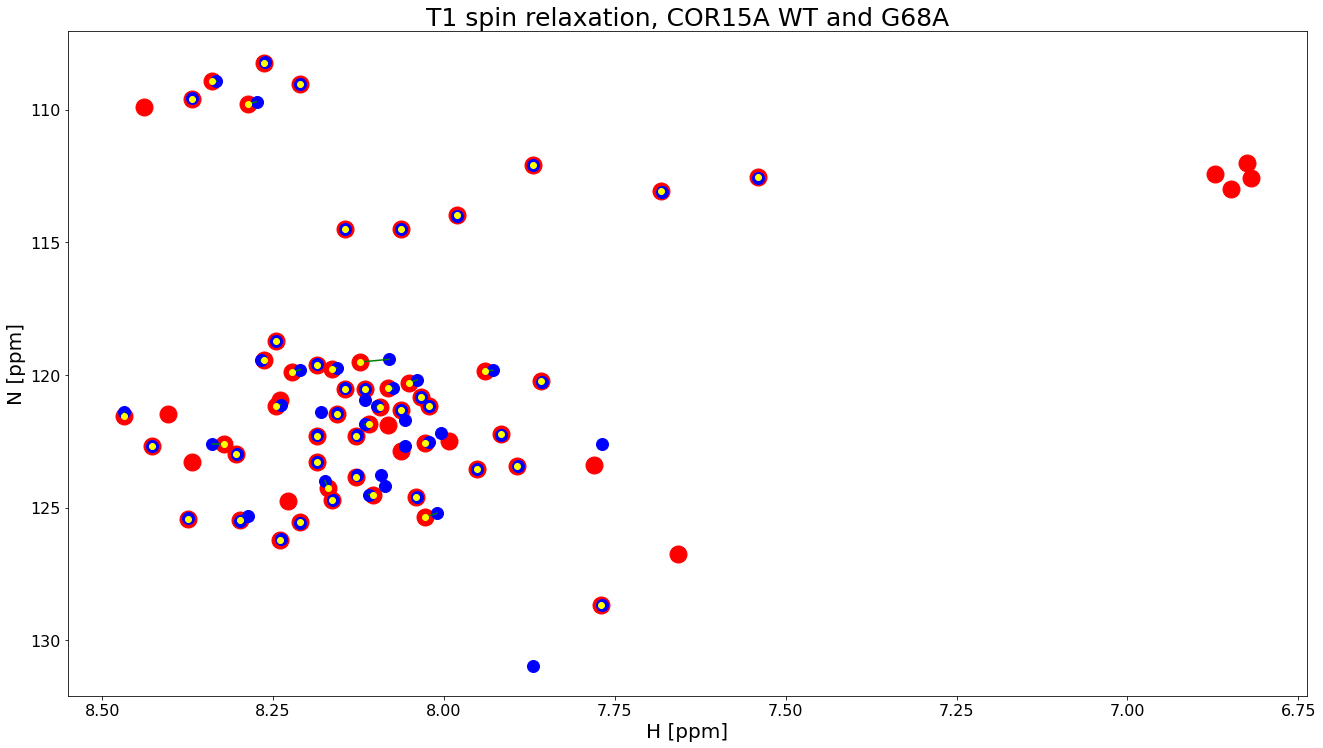

In [179]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
graph, (plot1) = plt.subplots(1, 1, figsize=(18.5, 10.5))
    
plt.tick_params(axis='both', which='major', labelsize=16)
plt.rcParams["figure.figsize"] = [18.5, 10.50]
plot1.set_title("T1 spin relaxation, COR15A WT and G68A",fontsize=25)
plot1.set_xlabel("H [ppm]",fontsize=20)
plot1.set_ylabel("N [ppm]",fontsize=20)
    
plot1.invert_xaxis()
plot1.invert_yaxis()
    
spectra1="Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022, experiment 110"
spectra2="Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022, experiment 110"

for i,peak in enumerate(WT[1]["peaks"]):
    plot1.plot(float(WT[1]["peaks"][peak]["ppm"][1]), float(WT[1]["peaks"][peak]["ppm"][0]),'o',markersize=17,color="red")

for i,peak in enumerate(G68A[1]["peaks"]):
    plot1.plot(float(G68A[1]["peaks"][peak]["ppm"][1]), float(G68A[1]["peaks"][peak]["ppm"][0]),'o',markersize=12,color="blue")

for peak in wt_vs_G68a:
    try:
        plot1.plot([float(wt_vs_G68a[peak][spectra1]["ppm"][1]),float(wt_vs_G68a[peak][spectra2]["ppm"][1])], [float(wt_vs_G68a[peak][spectra1]["ppm"][0]),float(wt_vs_G68a[peak][spectra2]["ppm"][0])],'-',markersize=8,color="green")
        plot1.plot(float(wt_vs_G68a[peak][spectra1]["ppm"][1]), float(wt_vs_G68a[peak][spectra1]["ppm"][0]),'o',markersize=6,color="yellow")
    except:
        pass
plt.show()

<Figure size 1332x756 with 0 Axes>

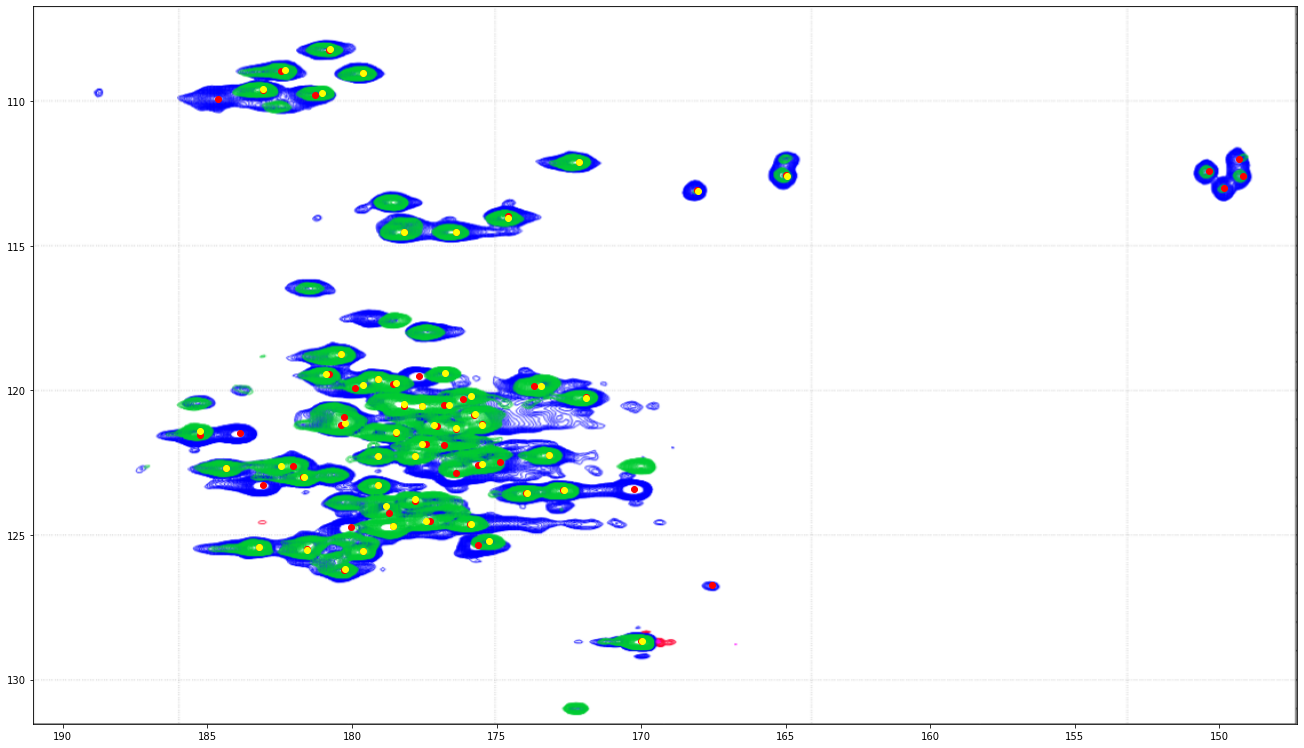

In [180]:
imageDim=(8.731,6.733,131.53,106.72)
image="/home/nenciric/Documents/git/COR15A_Tobi/ExperimentalData/600MHz/Tobbi_COR15A_G68A_0.35mM_17mM_Na-P_buffer_September2022/T1/experiment_110/T1_compare_with_wt.png"
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.rcParams["figure.figsize"] = [18.50, 10.50]
plt.rcParams["figure.autolayout"] = True
graph, (plot1) = plt.subplots(1, 1, figsize=(18.5, 10.5))

img = plt.imread(image)
factor=(imageDim[2]-imageDim[3])/10.5/((imageDim[0]-imageDim[1])/18.5)
plot1.imshow(img, extent=[factor*imageDim[0], factor*imageDim[1], imageDim[2], imageDim[3]])
plot1.set_xlim(imageDim[0]*factor, factor*imageDim[1])
plot1.set_ylim(imageDim[2], imageDim[3])
    
for peak in wt_vs_G68a:
    try:
        plot1.plot(float(wt_vs_G68a[peak][spectra1]["ppm"][1])*factor, float(wt_vs_G68a[peak][spectra1]["ppm"][0]),'o',markersize=6,color="red")
        plot1.plot(float(wt_vs_G68a[peak][spectra2]["ppm"][1])*factor, float(wt_vs_G68a[peak][spectra2]["ppm"][0]),'o',markersize=6,color="yellow")

    except:
        pass
plt.show()

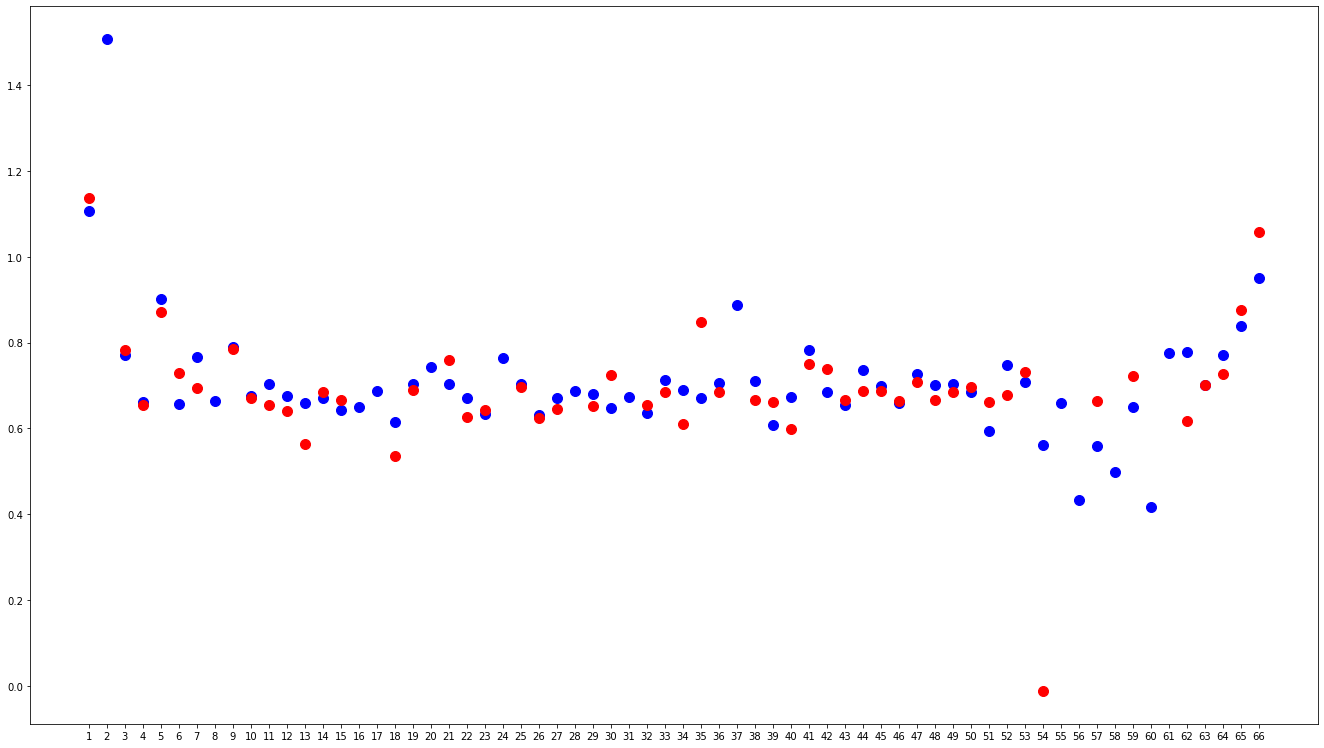

In [167]:
for peak in wt_vs_G68a:
    try:
        plt.plot(peak,wt_vs_G68a[peak][spectra1]["T1"],"o",color="blue",markersize=10)
    except:
        pass
    try:
        plt.plot(peak,wt_vs_G68a[peak][spectra2]["T1"],"o",color="red",markersize=10)
    except:
        pass

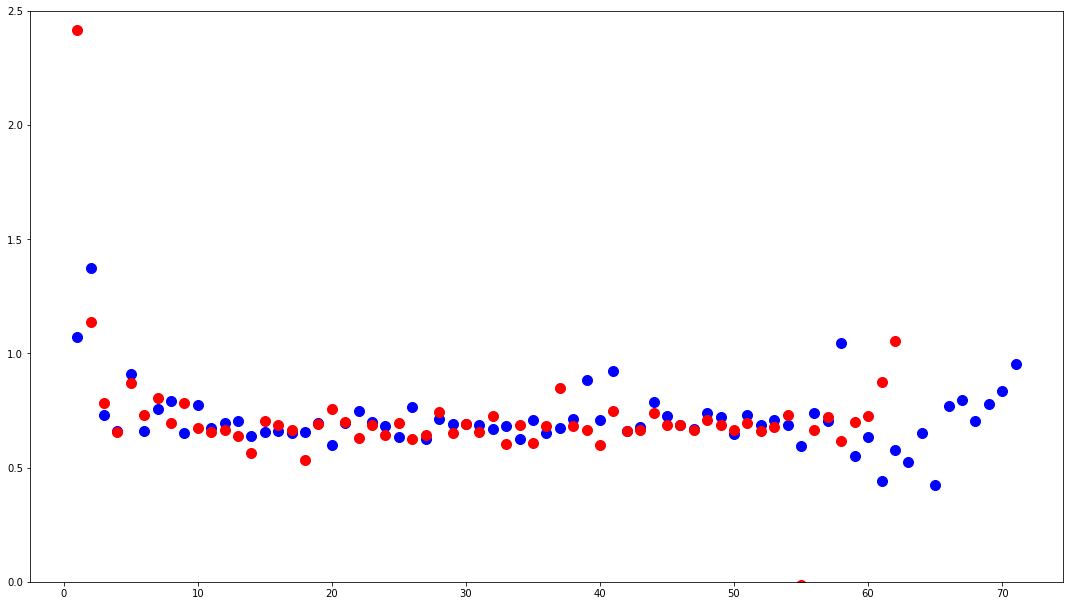

In [78]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylim(0,2.5)
for peak in WT:
    plt.plot(int(peak),float(WT[peak]["REFERENCE"]["T1"]),"o",color="blue",markersize=10)
    
for peak in G68A:
    plt.plot(int(peak),float(G68A[peak]["REFERENCE"]["T1"]),"o",color="red",markersize=10)

<H4> Check the fitting and quality od spectra for selected processing highlighted in figure above (highlight)</H4>

In [24]:
def analyze_single_peak(highlight,peak,rewrite=False,*results):

SyntaxError: incomplete input (3552582809.py, line 1)

<Figure size 1332x756 with 0 Axes>

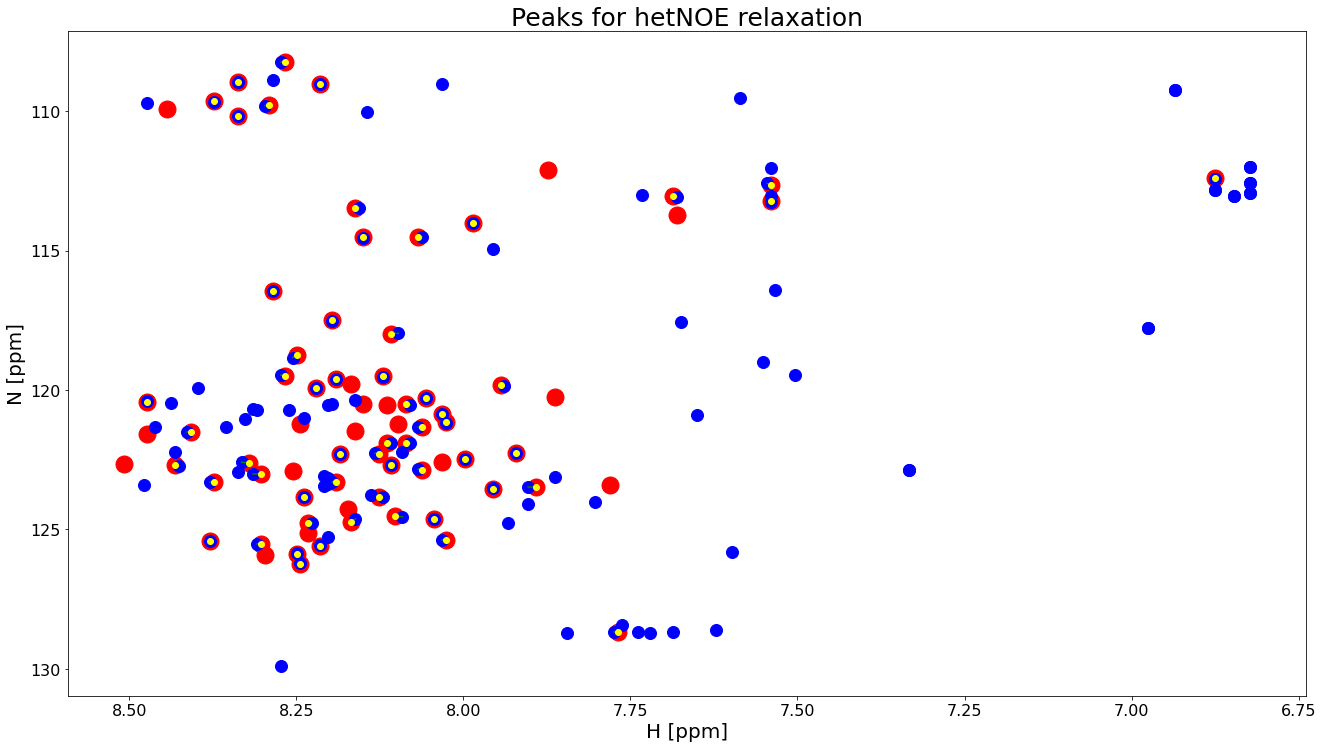

<Figure size 1332x756 with 0 Axes>

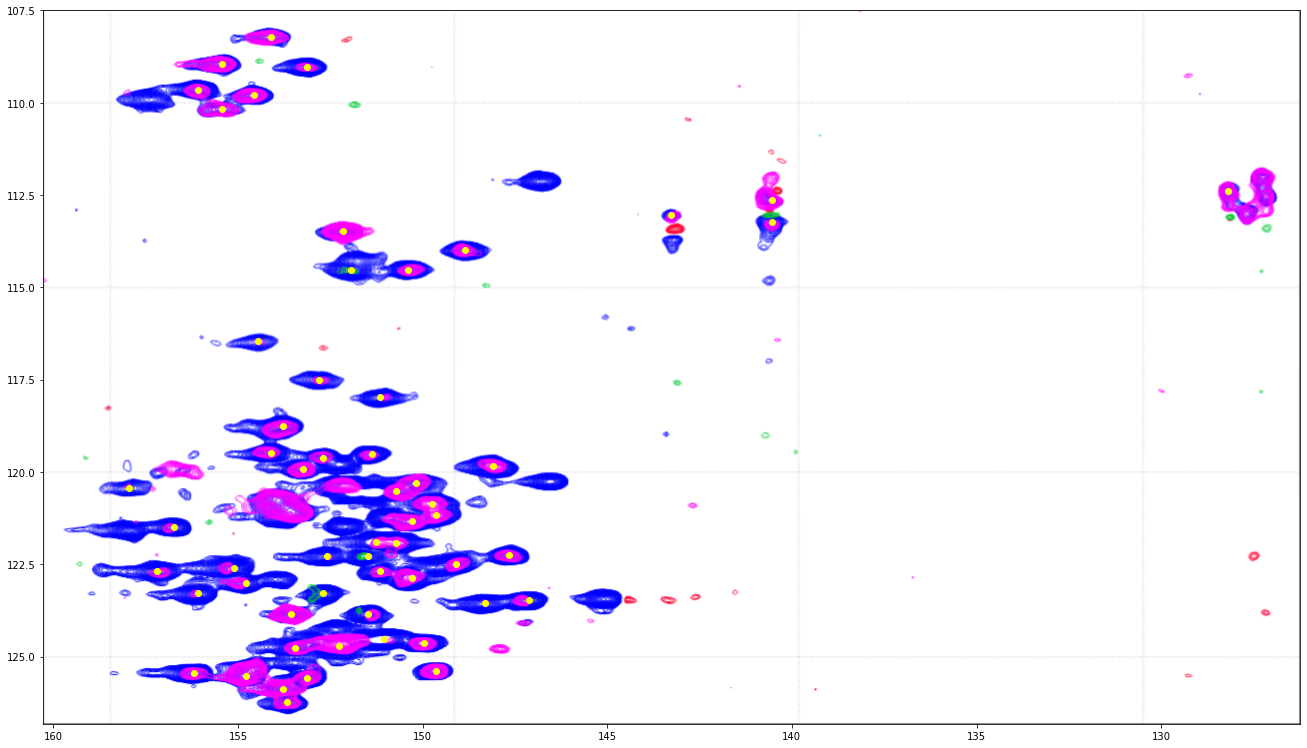

In [11]:
################################################
""" hetNOE analysis of WT COR15A from 600 MHz"""
################################################

path="/home/nenciric/Documents/git/COR15A_Tobi/ExperimentalData/600MHz/Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022/hetNOE/experimet_220/"
file1=path+"hetNoe_10220.txt"
file2=path+"hetNoe_10221.txt"
image=path+"hetNOE.png"
imageDim=(8.598, 6.772, 126.82, 107.5)
Nfactor=1/6
maxDist = 0.15 # to be tuned that the yellow peaks in the spectra below make sense 
savepath="AnalyzedData/hetNOE/"
saveName=savepath+"600MHz_hetNOE_Tobbi_COR15A_wt_0.9mM_20mM_Na-P_buffer_sample2_September2022.yaml"

hetNoe, peaks1, peaks2 =ERT.process_hetNoe(file1,file2,Nfactor,maxDist,image,imageDim) ##  Nfactor is used to weight the N dimention 
                                                         #   with respect to H dimention. Values in literature
                                                         #   range between 0.1 and 0.45"""

"""If satisfied, save the data"""
with open(saveName, 'w') as f:
    yaml.dump(hetNoe,f, sort_keys=False)

In [8]:
hetNoe

{'-26': {'NOE': {'ppm': ['8.4729', '120.4327'], 'intensity': 29612.16},
  'noNOE': {'ppm': ['8.4729', '120.3843'], 'intensity': -10500.24},
  'hetNOE': -0.35459216754198275},
 '-40': {'NOE': {'ppm': ['8.4318', '122.6902'], 'intensity': 108928.68},
  'noNOE': {'ppm': ['8.4259', '122.7225'], 'intensity': -17661.64},
  'hetNOE': -0.16213948429375993},
 '-36': {'NOE': {'ppm': ['8.4083', '121.4970'], 'intensity': 136715.2},
  'noNOE': {'ppm': ['8.4141', '121.4970'], 'intensity': -15899.43},
  'hetNOE': -0.1162959934228235},
 '-32': {'NOE': {'ppm': ['8.3730', '123.2869'], 'intensity': 152885.57},
  'noNOE': {'ppm': ['8.3789', '123.2869'], 'intensity': -12262.0},
  'hetNOE': -0.0802037759351651},
 '-56': {'NOE': {'ppm': ['8.3789', '125.4315'], 'intensity': 201707.24},
  'noNOE': {'ppm': ['8.3789', '125.4315'], 'intensity': -25954.84},
  'hetNOE': -0.12867579765604845},
 '-54': {'NOE': {'ppm': ['8.3730', '109.6448'], 'intensity': 139941.23},
  'noNOE': {'ppm': ['8.3730', '109.6771'], 'intensit

In [6]:
fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    graph, (plot1) = plt.subplots(1, 1, figsize=(18.5, 10.5))
    #plot1.xticks(fontsize=16)
    #plot1.yticks(fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.rcParams["figure.figsize"] = [18.5, 10.50]
    plot1.set_title("Peaks for hetNOE relaxation",fontsize=25)
    plot1.set_xlabel("H [ppm]",fontsize=20)
    plot1.set_ylabel("N [ppm]",fontsize=20)
    
    plot1.invert_xaxis()
    plot1.invert_yaxis()
    
    #plt.xlim(8.7, 6.75)
    #plt.ylim(132, 105)


IndentationError: unexpected indent (4101312669.py, line 2)

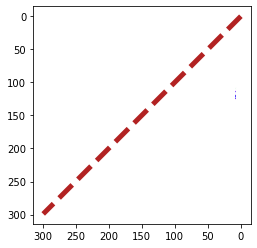

In [7]:
image=path+"hetNOE.png"
fig, ax = plt.subplots()
x = range(300)
img = plt.imread(image)
ax.imshow(img, extent=[8.598, 6.772, 126.82, 107.5])
ax.plot(x, x, '--', linewidth=5, color='firebrick')

In [349]:
dis=[]
for peak in hetNoe:
    distances=(math.dist([6*float(hetNoe[peak]["NOE"]["ppm"][0]), 
                                           float(hetNoe[peak]["NOE"]["ppm"][1])],
                                           [6*float(hetNoe[peak]["noNOE"]["ppm"][0]),
                                            float(hetNoe[peak]["noNOE"]["ppm"][1])
                                           ])) 
    dis.append(np.sqrt(distances))

In [350]:
print(np.median(dis))
print(np.mean(dis))
print(min(dis))
print(max(dis))

0.18654758106178745
0.16616844074587062
0.0
0.44352168970919015


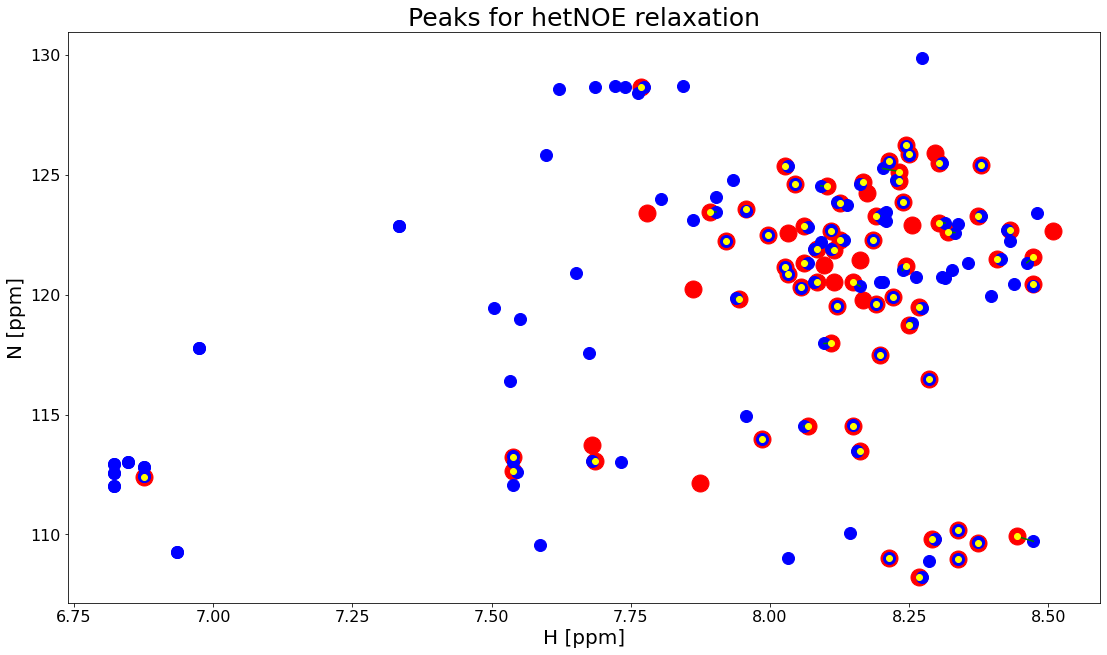

In [367]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Peaks for hetNOE relaxation",fontsize=25)
plt.xlabel("H [ppm]",fontsize=20)
plt.ylabel("N [ppm]",fontsize=20)

for i,peak in enumerate(peaks1["peaks"]):
    plt.plot(float(peaks1["peaks"][peak]["ppm"][0]), float(peaks1["peaks"][peak]["ppm"][1]),'o',markersize=17,color="red")
    
for i,peak in enumerate(peaks2["peaks"]):
    plt.plot(float(peaks2["peaks"][peak]["ppm"][0]), float(peaks2["peaks"][peak]["ppm"][1]),'o',markersize=12,color="blue")

for peak in hetNoe:
    plt.plot([float(hetNoe[peak]["NOE"]["ppm"][0]),float(hetNoe[peak]["noNOE"]["ppm"][0])], [float(hetNoe[peak]["NOE"]["ppm"][1]),float(hetNoe[peak]["noNOE"]["ppm"][1])],'-',markersize=8,color="green")
    plt.plot(float(hetNoe[peak]["NOE"]["ppm"][0]), float(hetNoe[peak]["NOE"]["ppm"][1]),'o',markersize=6,color="yellow")


In [21]:
def plot_data(comparison,coeffs,outputs):
    keys=["REFERENCE"]
    for i in range(len(coeffs)*len(outputs)):
        keys.append("file"+str(i))

    for file in keys:
        x_axis=[]
        y_axis=[]
        for peak in comparison:
            if file in comparison[peak]:
                x_axis.append(int(peak))
                y_axis.append(comparison[peak][file]["T1"])
                if int(comparison[peak][file]["COEFFICIENTS"])==0 and int(comparison[peak][file]["OUTPUT_POINTS"])==0:
                    refe=file
                else:
                    refe=-20
        if refe==file:
            plt.plot(x_axis, y_axis,'o',markersize=15)
        else:
            plt.plot(x_axis, y_axis,'o',markersize=5)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.xlabel('Peak')
    plt.ylabel('T1')
    plt.show()
    

In [4]:
x_axis=[]
y_axis=[]
for peak in results:
    x_axis.append(int(peak))
    one_line=[]
    for i,spectra in enumerate(results[peak]):
        one_line.append(results[peak][spectra]["T1"])
    y_axis.append(one_line)

#y_axis=np.reshape(y_axis, (len(y_axis), i+1)).T

[{'peaks': {'1': {'ppm': ['-97.274', '-218.151'],
    'experiment': array([4.24443536e+08, 4.25222697e+08, 4.15158102e+08, 3.76684597e+08,
           3.41511493e+08, 2.82319355e+08, 2.32653488e+08, 1.90636964e+08,
           1.10001542e+08, 7.77311220e+07]),
    'fit': (array([-0.9325281 , 19.92415721]),
     array([0.001129]),
     2,
     array([1.32134322, 0.50403581]),
     1.9984014443252818e-15),
    'points_used': 9},
   '2': {'ppm': ['-99.208', '-218.263'],
    'experiment': array([9948633., 9274010., 9305442., 6773313., 7538441., 5994742.,
           4972841., 5735706., 4800120.,       0.]),
    'fit': (array([-0.47875951, 16.02280489]),
     array([0.05545579]),
     2,
     array([1.31679107, 0.51581129]),
     1.3322676295501878e-15),
    'points_used': 6},
   '3': {'ppm': ['-99.724', '-217.682'],
    'experiment': array([1.19109539e+08, 1.30126346e+08, 1.22778990e+08, 1.03473009e+08,
           9.23236510e+07, 7.24841050e+07, 5.62079280e+07, 4.04031520e+07,
           1.99

In [248]:
file1={'peaks': {'-4': {'ppm': ['8.4787', '123.3997'], 'intensity': -9155.66},
  '-17': {'ppm': ['8.4729', '109.7093'], 'intensity': -9947.32},
  '-26': {'ppm': ['8.4729', '120.3843'], 'intensity': -10500.24},
  '-9': {'ppm': ['8.4611', '121.3357'], 'intensity': -9537.82},
  '-21': {'ppm': ['8.4376', '120.4488'], 'intensity': -10134.03},
  '-10': {'ppm': ['8.4318', '122.2387'], 'intensity': -9540.29},
  '-40': {'ppm': ['8.4259', '122.7225'], 'intensity': -17661.64}}}

file2={'peaks': {'2': {'ppm': ['8.5081', '122.6418'], 'intensity': 19040.42},
  '7': {'ppm': ['8.4729', '120.4327'], 'intensity': 29612.16},
  '43': {'ppm': ['8.4729', '121.5776'], 'intensity': 163877.44},
  '17': {'ppm': ['8.4435', '109.9190'], 'intensity': 67829.02},
  '23': {'ppm': ['8.4318', '122.6902'], 'intensity': 108928.68},
  '32': {'ppm': ['8.4083', '121.4970'], 'intensity': 136715.2},
  '62': {'ppm': ['8.3789', '125.4315'], 'intensity': 201707.24},
  '37': {'ppm': ['8.3730', '109.6448'], 'intensity': 139941.23},
  '42': {'ppm': ['8.3730', '123.2869'], 'intensity': 152885.57}}}




file1={'peaks': {'-4': {'ppm': ['0', '1'], 'intensity': -9155.66},
  '-17': {'ppm': ['1', '0'], 'intensity': -9947.32},
  '-18': {'ppm': ['1.2', '0'], 'intensity': -9947.32},
  '-26': {'ppm': ['3.1', '1.9'], 'intensity': -10500.24},
  '-9': {'ppm': ['2.1', '2.9'], 'intensity': -9537.82}}}

file2={'peaks': {'2': {'ppm': ['0', '0'], 'intensity': 19040.42},
  '7': {'ppm': ['3', '3'], 'intensity': 29612.16},
  '43': {'ppm': ['3', '2'], 'intensity': 163877.44},
  '17': {'ppm': ['2', '3'], 'intensity': 67829.02},
  '18': {'ppm': ['0', '1.1'], 'intensity': 67829.02},
  '19': {'ppm': ['0', '1.3'], 'intensity': 67829.02},
  '20': {'ppm': ['0.1', '1'], 'intensity': 67829.02},
  '21': {'ppm': ['1.1', '0.1'], 'intensity': 67829.02},
  '24': {'ppm': ['0.9', '0.1'], 'intensity': 67829.02},
  '22': {'ppm': ['1.1', '0.5'], 'intensity': 67829.02},
  '23': {'ppm': ['4', '4'], 'intensity': 108928.68}}}



reference=file2
files=[file1]
refName="NOE"
filName="noNOE"

for k,file in enumerate(files):
    distances=np.zeros([len(reference['peaks']),len(file['peaks'])])
    for i,ref_peak in enumerate(reference['peaks']):
        #print(float(reference[ref_peak]["ppm"][0]))
        for j,file_peak in enumerate(file['peaks']):
            distances[i,j]=(math.dist([float(reference['peaks'][ref_peak]["ppm"][0]), 
                            float(reference['peaks'][ref_peak]["ppm"][1])],
                            [float(file['peaks'][file_peak]["ppm"][0]),
                            float(file['peaks'][file_peak]["ppm"][1])
                            ])) 

relaxation_times={}
for ref_peak in reference['peaks']:
    relaxation_times[ref_peak]={}
    relaxation_times[ref_peak][refName]={}
    relaxation_times[ref_peak][refName]["ppm"]=reference['peaks'][ref_peak]["ppm"]
    relaxation_times[ref_peak][refName]["intensity"]=  reference['peaks'][ref_peak]["intensity"]            

            
reference_keys=list(reference['peaks'])
for i,file_peak in enumerate(file['peaks']):
    key=np.where(distances[:,i]==min(distances[:,i]))[0][0]
    print("searching for minima among {} options".format(len(distances[:,i])))
    print("key is {}".format(key))
    
    if 1==1:#np.where(distances[key,:]==min(distances[key,:]))[0][0]==i:
        relaxation_times[reference_keys[key]][filName]={}
        relaxation_times[reference_keys[key]][filName]["ppm"]=file['peaks'][file_peak]["ppm"]
        relaxation_times[reference_keys[key]][filName]["intensity"]=file['peaks'][file_peak]["intensity"]

             
hetNoe={}
for peak in relaxation_times:
    if "noNOE" in relaxation_times[peak] and "NOE" in relaxation_times[peak]:
        hetNoe[peak]={}
        hetNoe[peak]["NOE"]=relaxation_times[peak]["NOE"]
        hetNoe[peak]["noNOE"]=relaxation_times[peak]["noNOE"]
        hetNoe[peak]["hetNOE"]=float(relaxation_times[peak]["noNOE"]["intensity"])/float(relaxation_times[peak]["NOE"]["intensity"])
    

searching for minima among 11 options
key is 6
searching for minima among 11 options
key is 8
searching for minima among 11 options
key is 7
searching for minima among 11 options
key is 2
searching for minima among 11 options
key is 3


In [249]:
distances

array([[1.        , 1.        , 1.2       , 3.63593179, 3.58050276],
       [3.60555128, 3.60555128, 3.49857114, 1.1045361 , 0.90553851],
       [3.16227766, 2.82842712, 2.69072481, 0.14142136, 1.27279221],
       [2.82842712, 3.16227766, 3.10483494, 1.55563492, 0.14142136],
       [0.1       , 1.48660687, 1.62788206, 3.20156212, 2.76586334],
       [0.3       , 1.64012195, 1.7691806 , 3.15753068, 2.64007576],
       [0.1       , 1.3453624 , 1.48660687, 3.13209195, 2.75862284],
       [1.42126704, 0.14142136, 0.14142136, 2.69072481, 2.97321375],
       [1.27279221, 0.14142136, 0.31622777, 2.84253408, 3.04630924],
       [1.2083046 , 0.50990195, 0.50990195, 2.44131112, 2.6       ],
       [5.        , 5.        , 4.88262225, 2.28473193, 2.19544984]])

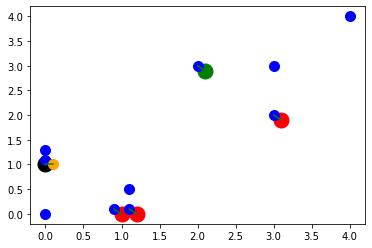

In [250]:
peaks1=file1
peaks2=file2
for i,peak in enumerate(peaks1["peaks"]):
    if i==0:
        plt.plot(float(peaks1["peaks"][peak]["ppm"][0]), float(peaks1["peaks"][peak]["ppm"][1]),'o',markersize=15,color="black")
    elif i==4:
        plt.plot(float(peaks1["peaks"][peak]["ppm"][0]), float(peaks1["peaks"][peak]["ppm"][1]),'o',markersize=15,color="green")
    else:
        plt.plot(float(peaks1["peaks"][peak]["ppm"][0]), float(peaks1["peaks"][peak]["ppm"][1]),'o',markersize=15,color="red")
    
for i,peak in enumerate(peaks2["peaks"]):
    if i==6:
        plt.plot(float(peaks2["peaks"][peak]["ppm"][0]), float(peaks2["peaks"][peak]["ppm"][1]),'o',markersize=10,color="orange")
    else:
        plt.plot(float(peaks2["peaks"][peak]["ppm"][0]), float(peaks2["peaks"][peak]["ppm"][1]),'o',markersize=10,color="blue")

for peak in hetNoe:
    #plt.plot(float(hetNoe[peak]["NOE"]["ppm"][0]), float(hetNoe[peak]["NOE"]["ppm"][1]),'o',markersize=15,color="red")
    #plt.plot(float(hetNoe[peak]["noNOE"]["ppm"][0]), float(hetNoe[peak]["noNOE"]["ppm"][1]),'o',markersize=10,color="blue")
    plt.plot([float(hetNoe[peak]["NOE"]["ppm"][0]),float(hetNoe[peak]["noNOE"]["ppm"][0])], [float(hetNoe[peak]["NOE"]["ppm"][1]),float(hetNoe[peak]["noNOE"]["ppm"][1])],'-',markersize=8,color="green")
    


In [204]:
distances

array([[ 0.75847002,  2.96700567,  1.82210923, 13.48074596,  0.71104842,
         1.90400196,  2.03424956, 13.75530612,  0.15458438],
       [12.9325479 , 10.7234    , 11.8683    ,  0.21175091, 12.98096507,
        11.78787701, 15.722481  ,  0.11891283, 13.57796751],
       [ 2.25777441,  0.0484    ,  1.1933    , 10.4653413 ,  2.30626625,
         1.11457366,  5.04807526, 10.73996463,  2.90431864],
       [ 1.30694537,  0.9030771 ,  0.24218763, 11.41671357,  1.35481687,
         0.16972192,  4.09662477, 11.69123195,  1.95318792],
       [ 2.19413292,  0.0387982 ,  1.12935182, 10.52980165,  2.2414075 ,
         1.04860943,  4.98304575, 10.80419313,  2.83883511],
       [ 0.4102576 ,  1.80646761,  0.66237634, 12.31970556,  0.4515    ,
         0.74207219,  3.19323821, 12.59403727,  1.04984793],
       [ 0.11519258,  2.29028231,  1.14586431, 12.8035121 ,  0.03283443,
         1.22562637,  2.70940768, 13.07780699,  0.56687368]])

In [97]:
def find(s, k):
    sequence="abc"
    abc={}
    for letter in sequence:
        abc[letter]=0
    a=False
    b=False
    c=False
    for i,letter in enumerate(s):
        abc[letter]+=1
        if abc["a"]>k-1 and abc["b"]>k-1 and abc["c"]>k-1:
            break
    left=i+1
    
    abc={}
    for letter in sequence:
        abc[letter]=0
    
    for i in range(len(s)-1,-1,-1):
        print(s[i])
        abc[s[i]]+=1
        #print(abc)
        if abc["a"]>k-1 and abc["b"]>k-1 and abc["c"]>k-1:
            break
    #print("i is {}".format(i))
    right=len(s)-i
        
    print(left)
    print(right)
    
    return(min(left,right))
    # TODO

if __name__ == "__main__":
    print(find("abc", 1)) # 3
    print(find("aabca", 1)) # 3
    print(find("aaaabbbcccc", 1)) # 6
    print(find("aabbaacc", 2)) # 6
    print(find("aaaabbbbaaaccccaaccacbbaa", 3)) # 13

c
c
c
c
b
b
b
a
8
8
8


In [69]:
abc="abvg"

In [74]:
for i in range(3,-1,-1):
    print(abc[i])

g
v
b
a


In [3]:
a=None

In [4]:
a

In [5]:
if a==None:
    print("yay")

yay


In [7]:
(123.6, 34.4, 3434.5, 45.5 )[0]

123.6

In [16]:
def whatAday(oneMoreFile,*manyFiles):
    for f in manyFiles:
        print(f)
    
    print("is there the oneMore?", oneMoreFile)

In [17]:
peaks=[25, 45808346, 47218752, 40481233, 30521244, 24368233, 16572535, 10293606,
  6524593,        0,  3921522,]

peaks=[25,9948633., 9274010., 9305442., 6773313., 7538441., 5994742.,
           4972841., 5735706., 4800120.,       0.]
mixing_times = [0.02, 0.05, 0.1 , 0.2 , 0.3 , 0.5 , 0.7 , 0.9 , 1.5 , 1.9 ]

In [18]:
for_LS=np.array([[0, 0]])
for i in range(1,len(peaks)):
    if i<len(peaks)-1:
        if peaks[i]==0:
            break
        elif peaks[i]<peaks[i+1]:
            print("Peak {}: {} is smaler than peak {}: {}".format(i,peaks[i],i+1,peaks[i+1]))
            pass
        else:
            for_LS=np.append(for_LS,[[mixing_times[i-1],(peaks[i])]],axis=0)
                       
    else:
        if peaks[i]==0:
            break
        else:
            for_LS=np.append(for_LS,[[mixing_times[i-1],(peaks[i])]],axis=0)

Peak 2: 9274010.0 is smaler than peak 3: 9305442.0
Peak 4: 6773313.0 is smaler than peak 5: 7538441.0
Peak 7: 4972841.0 is smaler than peak 8: 5735706.0


In [19]:
for_LS

array([[0.000000e+00, 0.000000e+00],
       [2.000000e-02, 9.948633e+06],
       [1.000000e-01, 9.305442e+06],
       [3.000000e-01, 7.538441e+06],
       [5.000000e-01, 5.994742e+06],
       [9.000000e-01, 5.735706e+06],
       [1.500000e+00, 4.800120e+06]])

In [20]:
peaks

[25,
 9948633.0,
 9274010.0,
 9305442.0,
 6773313.0,
 7538441.0,
 5994742.0,
 4972841.0,
 5735706.0,
 4800120.0,
 0.0]

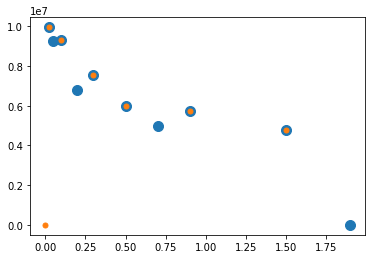

In [22]:
plt.plot(mixing_times,peaks[1:],"o",markersize=10)
plt.plot(for_LS[:,0],for_LS[:,1],"o",markersize=5)

In [23]:
ERT.print_results(*results)

TypeError: t1_t2_relaxations() missing 6 required positional arguments: 'field', 'coeff', 'outputP', 'author', 'info', and 'increments'

In [25]:
import time

alku = time.time()
lista=[]
for i in range(10**5):
    lista.append(i)
loppu = time.time()
print("aikaa kului", loppu-alku, "s")


alku = time.time()
for i in range(10**5):
    del lista[0]
# testattava koodi
loppu = time.time()
print("aikaa kului", loppu-alku, "s")

aikaa kului 0.008671283721923828 s
aikaa kului 0.94716477394104 s


15